# Prueba Intertrimestral

**Nombre:**  Maria 
**Apellidos:**  Moreno Nieto

**Tiempo de la prueba:** 2 horas  
**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos  
**Fecha:** 16 de octubre de 2025  

## Instrucciones

- Escribe **código limpio y autoexplicativo**.  
- Se pueden utilizar **los materiales de clase**.  
- Se puede utilizar **internet** para búsqueda de dudas y documentación.  
- **No se puede utilizar ningún tipo de LLM** (ChatGPT, Copilot, Gemini, etc.).  
- **No se puede utilizar mensajería instantánea**.  
- Al finalizar, **sube tu notebook a GitHub** y envía el enlace del fichero en el siguiente formulario:  
[https://forms.office.com/e/LFVwu9z6uQ](https://forms.office.com/e/LFVwu9z6uQ)


## Dataset “Life Style Data”

El dataset contiene información sobre hábitos de vida (alimentación, sueño, ejercicio, consumo de tabaco o alcohol, etc.) y medidas de salud (IMC, presión arterial, etc.) para diferentes individuos.

Puedes descargarlo del repositorio de la asignatura y un .txt con la descripción de las variables.


## Inicialización de librerías

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



from scipy import stats
from itertools import combinations

# Ejercicio 1 — Programación (2 puntos)

a) (0.6 pts) Crea una función imc(weight, height) que devuelva el índice de masa corporal (IMC), redondeado a dos decimales.



In [119]:
def imc(weight, height):

    #Calcula el Índice de Masa Corporal (IMC).

    return round(weight / (height ** 2), 2)


peso = 70  
altura = 1.75  
resultado = imc(peso, altura)
print(type(altura))
print(f"Tu IMC es: {resultado}")


<class 'float'>
Tu IMC es: 22.86


b) (0.6 pts) Crea una función saludable(imcValue) que devuelva "Saludable" si el IMC está entre 18.5 y 24.9, "Bajo peso" si es menor de 18.5, o "Sobrepeso" si es mayor de 24.9.

In [120]:
def saludable(imcValue):

    if imcValue < 18.5:
        mensaje = "Sobrepeso"
    elif (imcValue >= 18.5) & (imcValue <= 24.9):
        mensaje = "Saludable"
    else:
        mensaje = "Sobrepeso"

    return mensaje

print(saludable(17))


Sobrepeso


c) (0.6 pts) Genera un DataFrame llamado imcData que contenga al menos 10 registros con las siguientes columnas:


*   peso (en kilogramos)

*   altura (en metros)

*   imc (calculado usando la función imc(weight, height) creada anteriormente)

Puedes generar los datos de peso y altura manualmente, mediante listas, o de forma aleatoria utilizando numpy (np.random.uniform o similar).

Añade una cuarta columna llamada categoria, cuyos valores provengan de la función saludable(imcValue).

Muestra las primeras filas del DataFrame resultante y comprueba que los tipos de datos son correctos.

In [121]:
n = 10

# Generamos peso y altura según el sexo
altura =[1,1.15,1.3,1.4,1.45,1.5,1.55,1.6,1.65,1.65]
peso = [30,32,34,37,46,47,65,87,96,55]
lista_imc = []
lista_categoria = []
# Calculamos BMI

for i in range (n):  
    peso_valor = peso[i]
    altura_valor = altura[i]
    imc_valor = imc(peso_valor, altura_valor)
    lista_imc.append(imc_valor)
    categoria_valor = saludable(imc_valor)
    lista_categoria.append(categoria_valor)

In [122]:
# -------------------------------
# Crear un DataFrame simple
# -------------------------------
# Creamos DataFrame
df = pd.DataFrame({
    'Altura': altura,
    'Peso': peso,
    'IMC': lista_imc,
    'Categoria': lista_categoria
})

print("DataFrame original:")
print(df.head())

DataFrame original:
   Altura  Peso    IMC  Categoria
0    1.00    30  30.00  Sobrepeso
1    1.15    32  24.20  Saludable
2    1.30    34  20.12  Saludable
3    1.40    37  18.88  Saludable
4    1.45    46  21.88  Saludable


d) (0.2 pts) ¿Cómo podrías integrar ambas funciones dentro de una clase llamada HealthTools que calcule el IMC y clasifique automáticamente a partir de listas de pesos y alturas?

In [123]:
class MapaLogistico:
    
    def __init__(self, peso, altura):
        self.peso = peso
        self.altura = altura
        
    
    def imc(weight, height):

    #Calcula el Índice de Masa Corporal (IMC).

        return round(weight / (height ** 2), 2)

    def saludable(imcValue):

        if imcValue < 18.5:
            mensaje = "Sobrepeso"
        elif (imcValue >= 18.5) & (imcValue <= 24.9):
            mensaje = "Saludable"
        else:
            mensaje = "Sobrepeso"

        return mensaje
    
    lista_imc = []
    lista_categoria = []
    
    for i in range (n):  
        peso_valor = peso[i]
        altura_valor = altura[i]
        imc_valor = imc(peso_valor, altura_valor)
        lista_imc.append(imc_valor)
        categoria_valor = saludable(imc_valor)
        lista_categoria.append(categoria_valor)
    
    df = pd.DataFrame({
    'Altura': altura,
    'Peso': peso,
    'IMC': lista_imc,
    'Categoria': lista_categoria
})



# Crear una instancia de la clase
altura =[1,1.15,1.3,1.4,1.45,1.5,1.55,1.6,1.65,1.65]
peso = [30,32,34,37,46,47,65,87,96,55]
mapa = MapaLogistico (peso, altura)


## Ejercicio 2 — Exploración y visualización (3 puntos)

a) (0.75 pts) Carga el dataset desde el fichero CSV y guárdalo en un DataFrame llamado lifeStyleData. Muestra las 5 primeras filas, el número de filas y columnas.

In [124]:
lifeStyleData = pd.read_csv("Final_data.csv")

lifeStyleData.head(5)


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [125]:

print("\nForma del DataFrame:")
print(lifeStyleData.shape)       # (filas, columnas)


Forma del DataFrame:
(20000, 54)


b) (0.75 pts) Crea una función describeData(dataFrame) que devuelva para cada columna: tipo de dato, número de valores nulos y porcentaje de nulos.

In [126]:
#lifeStyleData.info()

def describeData(dataFrame):
    summary = pd.DataFrame({
        'Tipo de Dato': dataFrame.dtypes,
        'Valores Nulos': dataFrame.isnull().sum(),
        'Porcentaje Nulos (%)': (dataFrame.isnull().mean() * 100)
    })
    return summary

c) (0.75 pts) Usa describeData(lifeStyleData) y comenta brevemente (2–3 líneas) qué variables parecen tener más valores faltantes.

In [127]:
describeData(lifeStyleData)

,Tipo de Dato,Valores Nulos,Porcentaje Nulos (%)
Age,float64,0,0.000
Gender,object,0,0.000
Weight (kg),float64,0,0.000
Height (m),float64,0,0.000
Max_BPM,float64,1,0.005
Avg_BPM,float64,1,0.005
Resting_BPM,float64,0,0.000
Session_Duration (hours),float64,0,0.000
Calories_Burned,float64,0,0.000
Workout_Type,object,0,0.000


Las unicas 3 columnas en las que falta un único valor son max_bpm, avg_bpm y cholesterol, por lo que tenemos un dataset bastante completo

d) (0.75 pts) Realiza un gráfico que muestre las correlaciones entre variables numéricas. ¿Hay alguna correlación fuerte o inesperada?

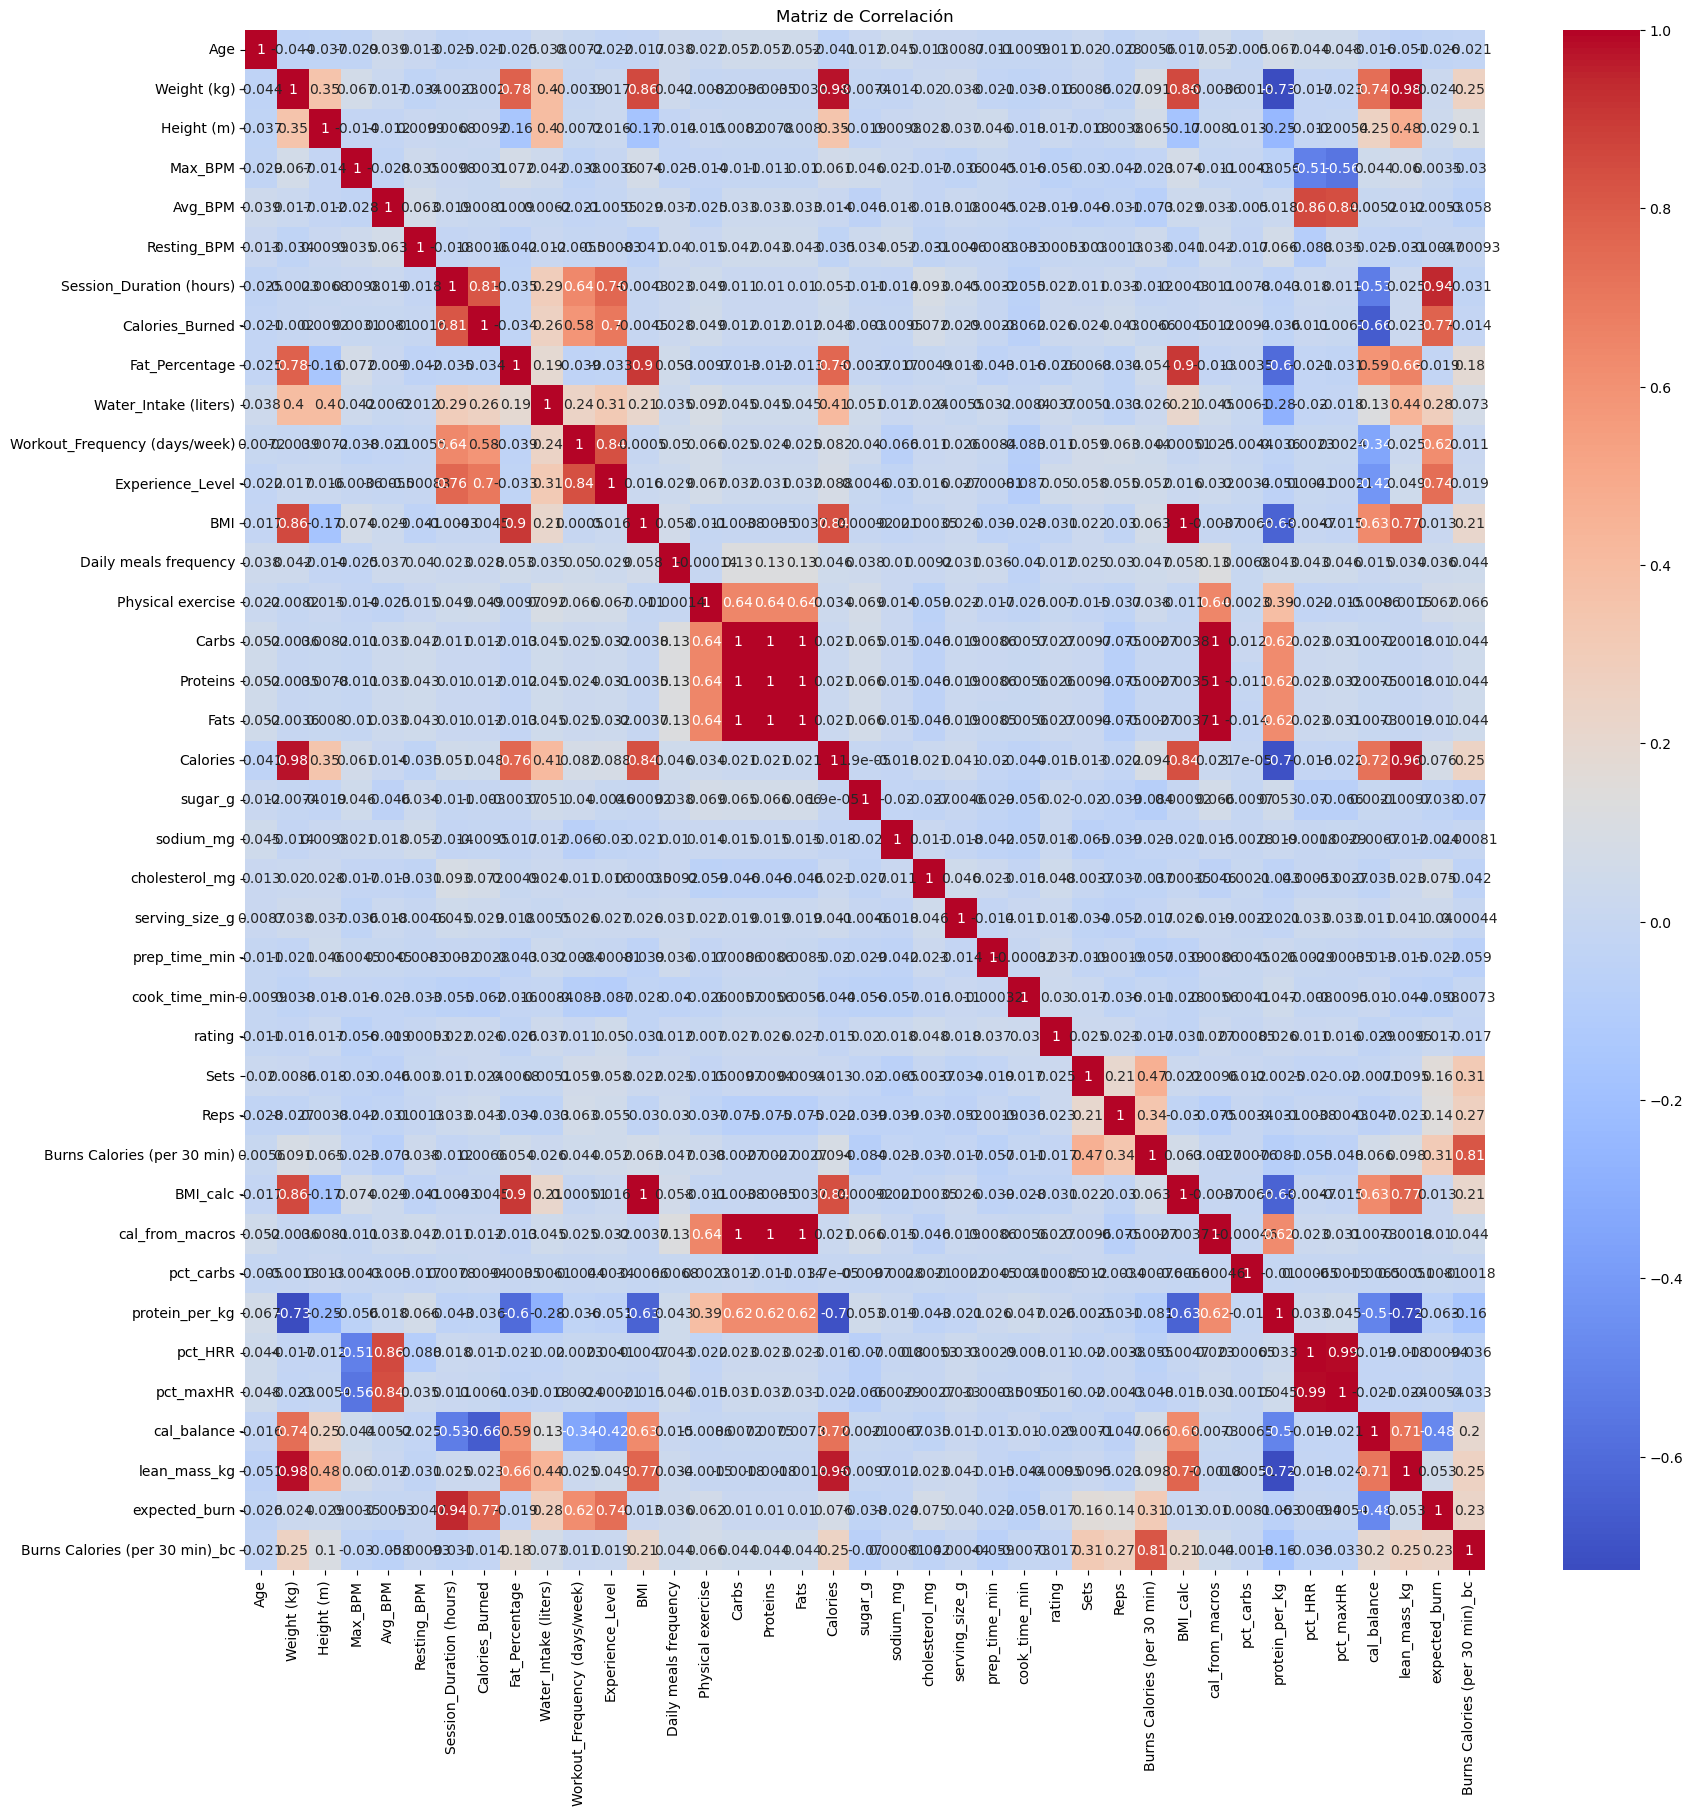

In [128]:
df_numericas = lifeStyleData.select_dtypes('float64')

correlation_matrix = df_numericas.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


Variables como lean mass y weight, calories con weight, session duration y expectation burn, cal from macros con carbs, fats y proteins, todas aquellas en rojo. Basicamente weight muy relacionado con calorias y con lean mass, lo cual tiene sentido ya que en funcion de tu peso varia la masa corporal y en fucnion de calorias ingeridas tu peso. Por otro lado las macros son directamente relacionadas con carbs, fats y proteinas. 

## Ejercicio 3 — Regresión básica (2 puntos)

Queremos predecir una variable de salud continua, por ejemplo bmi.

a) (0.25 pts) Define targetVar = "bmi" y selecciona 2–3 variables predictoras (por ejemplo sleepHours, activityLevel, calories). Guarda las columnas predictoras en X y la variable objetivo en y.

In [129]:
# --- A. Cargar dataset ---

#elegimos variable que tienen correlacion con bmi y asi obtenemos un modelo mejor

X = pd.DataFrame(lifeStyleData, columns=["lean_mass_kg","cal_balance","Fat_Percentage"])
targetVar = lifeStyleData.BMI
y = targetVar

# X.head()
# y.head()

b) (0.25 pts) Divide los datos en entrenamiento (70 %) y prueba (30 %).

In [130]:
# --- B. División train/test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

c) (0.75 pts) Entrena un modelo de regresión lineal (LinearRegression) y calcula el R² y el MSE.

In [131]:
# --- C. Entrenar modelo ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- D. Predicciones ---
y_pred = model.predict(X_test)

# --- E. Evaluación básica ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regresión Logística")
print(f"MSE: {mse:.3f}, R²: {r2:.3f}")

Regresión Logística
MSE: 5.991, R²: 0.869


d) (0.75 pts) Entrena un RandomForestRegressor con los mismos datos y compara resultados. ¿Cuál tiene mejor rendimiento?

In [133]:
# Modelo Random Forest Regressor
reg = RandomForestRegressor(
    n_estimators=100, max_depth=None, random_state=42
)
reg.fit(X_train, y_train)

# Predicciones
y_pred = reg.predict(X_test)

# Métricas
mse_forest = mean_squared_error(y_test, y_pred)
r2_forest = r2_score(y_test, y_pred)

print("Regresión – Random Forest")
print(f"MSE: {mse_forest:.3f}, R²: {r2_forest:.3f}")

Regresión – Random Forest
MSE: 4.730, R²: 0.897


Utilizando r2 y mse como variables para comparar que modelo es mejor sacamos la conclusion de que predice un poco mejor nuestor modelo de Random Forest donde:

- r2 = Proporción de varianza explicada por el modelo
- mse = Media de los errores al cuadrado

Por lo tanto buscamos un valor alto de r2 que será cuanto soy capaz de explicar con mi modelo, y una variable mse baja ya que cuanto mas alta, entonces mas error. Por ello como random forest tiene tanto un mse mas bajo y un r2 mas alto, es un mejor modelo en este caso

## Ejercicio 4 — Clasificación sencilla (2 puntos)

Crea una nueva variable binaria que indique si el IMC está dentro del rango saludable.

a) (0.25 pts) Crea una nueva columna bmiHealthy donde el valor sea 1 si bmi está entre 18.5 y 24.9, y 0 en caso contrario.

In [136]:
bmiHealthy_list = []

for i in range (len(lifeStyleData)):
    imcValue = lifeStyleData.BMI[i]
    if (imcValue >= 18.5) & (imcValue <= 24.9):
        valor = 1
    else:
        valor = 0
    bmiHealthy_list.append(valor)    


lifeStyleData['bmiHealthy'] = bmiHealthy_list
# lifeStyleData.head(5)

b) (0.75 pts) Entrena un modelo de regresión logística (LogisticRegression) para predecir bmiHealthy usando algunas variables de estilo de vida (por ejemplo sleepHours, activityLevel, calories).

In [137]:
X = pd.DataFrame(lifeStyleData, columns=["Calories","Resting_BPM","Calories_Burned", "Daily meals frequency","Water_Intake (liters)", "Workout_Frequency (days/week)"])
y = lifeStyleData.bmiHealthy

X.head()


,Calories,Resting_BPM,Calories_Burned,Daily meals frequency,Water_Intake (liters),Workout_Frequency (days/week)
0,1806.0,69.05,1080.90,2.99,1.50,3.99
1,1577.0,73.18,1809.91,3.01,1.90,4.00
2,1608.0,54.96,802.26,1.99,1.88,2.99
3,2657.0,50.07,1450.79,3.00,2.50,3.99
4,1470.0,70.84,1166.40,3.00,2.91,4.00


In [138]:
# --- B. División train/test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# --- C. Modelo ---
model = LogisticRegression(random_state=42, max_iter=1000)  # max_iter alto para convergencia
result = model.fit(X_train, y_train)

# --- D. Predicción y métricas ---
y_pred = model.predict(X_test)

c) (0.25 pts) Calcula la exactitud (accuracy) del modelo y muestra la matriz de confusión.


La Accuracy es: 0.5876666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.80      0.71      3707
           1       0.43      0.24      0.30      2293

    accuracy                           0.59      6000
   macro avg       0.53      0.52      0.51      6000
weighted avg       0.55      0.59      0.55      6000



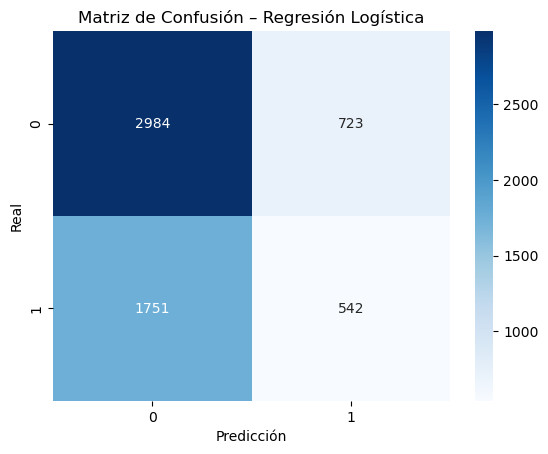

In [139]:
print("La Accuracy es:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- E. Matriz de confusión ---
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión – Regresión Logística")
plt.show()

d) (0.75 pts) Explica qué variable parece influir más según el modelo.

In [140]:
coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente":result.coef_[0]
})
coeficientes

,Variable,Coeficiente
0,Calories,-0.001231
1,Resting_BPM,0.006129
2,Calories_Burned,0.000245
3,Daily meals frequency,-0.051304
4,Water_Intake (liters),0.146526
5,Workout_Frequency (days/week),0.265021


Según este modelo, si miramos los coeficientes, entonces obtenemos que las variables que parecen más explicativas en este modelo serían Workout_Frequency indicada por los dias a la semana que se hace deporte y también water_intake, medida en litros ya que son las que tienen los coeficientes mas altos

## Ejercicio 5 — Conclusión (1 punto)

En un máximo de 300 palabras, resume:

*   Qué hábitos parecen tener mayor relación con el estado de salud.

*   Qué modelo fue más eficaz y por qué.

*   Qué podrías mejorar si tuvieras más tiempo o datos.



Hemos realizado un análisis para obtener datos sobres los habitos de su salud y su impacto en el BMI. Primero de nuestro analisis por correlacion, obtenemos que peso, grasa, lean mas y calorias tienen una correlacion muy alta con el bmi, lo cual indica que son variables que afectan mucho a que este sea saludable (ya que cuanto mas altas, mas alto sera el bmi y mas cerca de sobrepeso. 

Por otro lado de los modelos lineal regresion y random forest, de los cuales hemos obtenido buenos resultados deducimos entones que las variables s realizado una regresion lineal y luego un random forest para predecir al haber usado dos de estas variables y tambien cal balance nos confirma esta teoria.

finalmente de la regresion logistica vemos como tambien mucho ejercicio y tambien ingerir mucha agua va a innfluir mucho a ser saludables (ya que son coeficientes positivos y mas altos, entonces mas relacionados, ademas calorias es inverso entonces a mas alto intake de calorias, menos probabilidad de ser saludable.REsting bpm y calorias burnes son positivas asi que se relacionan en positivo pero mas pequeñas los coef. 